# Assignment_4 DT

## Name: Rahma abdelkader
## bn  : 31
## sec : 1

In [189]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [190]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

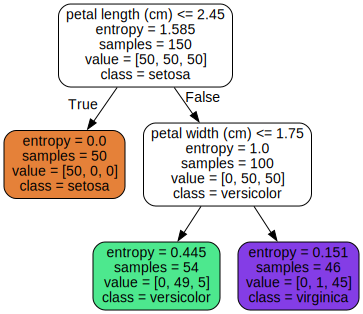

In [191]:
# Answer:


import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join("./", "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("./", "iris_tree.dot"))



## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [192]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

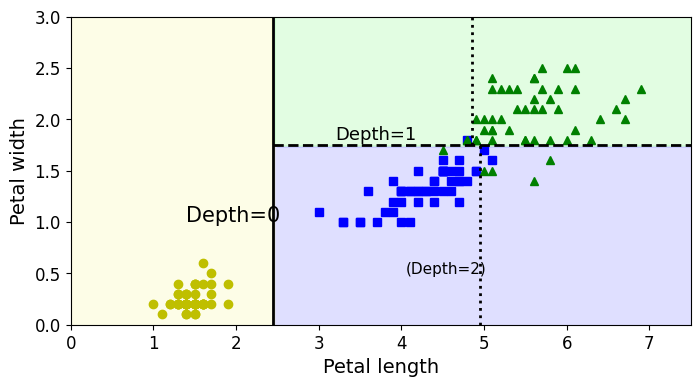

In [193]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. left block ==> Entropy is 0 as all values in the target column are similar and right block ==> Entropy is 1 as the target column has equal number values for both classes

2. Difference ==> when we increase number of depth, the accuarcy increase

In [194]:
####### YOUR CODE HERE
tree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf_1.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

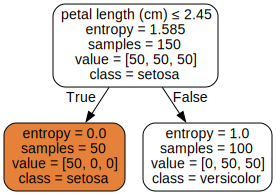

In [195]:
dot_data = export_graphviz(tree_clf_1, out_file=None,feature_names=iris.feature_names[2:],class_names=iris.target_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)
graph

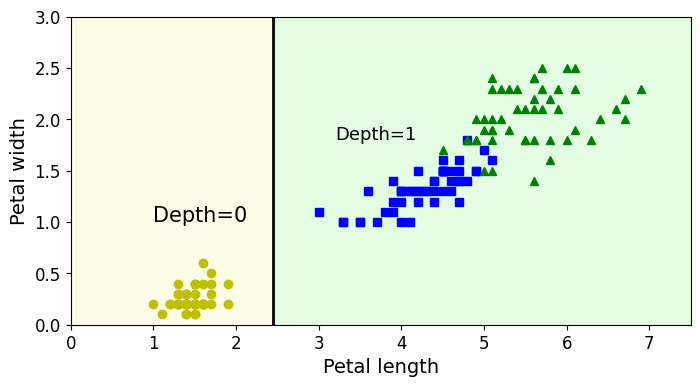

In [196]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_1, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.text(1.0, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.show()

In [197]:
tree_clf_10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf_10.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

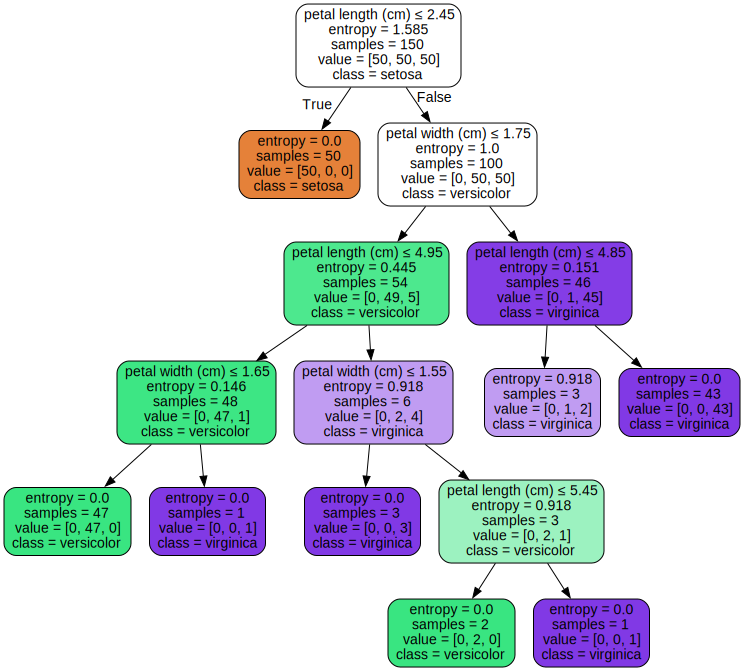

In [198]:
dot_data = export_graphviz(tree_clf_10, out_file=None,feature_names=iris.feature_names[2:],class_names=iris.target_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)
graph

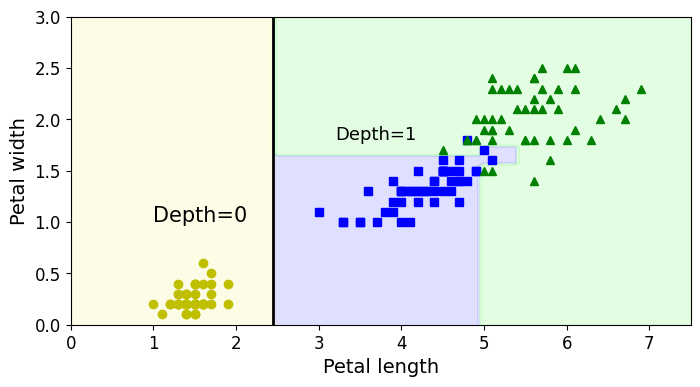

In [199]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_10, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.text(1.0, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.show()

### Q2.2

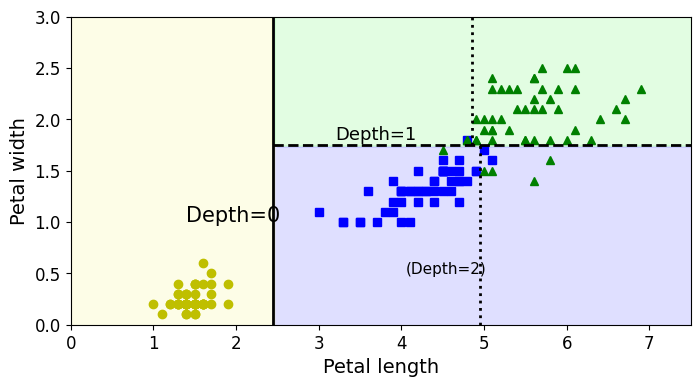

In [200]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. from the above graph, as 5 is not less than 2.45 we go to the right block . since 1.5 less than 1.75 , we go to the left block
### Calculating probability :
2- as the total number of sample is 54 whicn includes values of (0,49,5),then the probaility of each is (0/54),(49/54),(5/54) ==> (0,0.9074,0.09259)
which same numbers as we got as output from predict_proba.

In [201]:
######### Your code for 2

prediction = tree_clf.predict_proba([[5,1.5]])
print("predict_proba=",prediction)

####################################
predict=tree_clf.predict([[5, 1.5]])
print("predict=",predict)

predict_proba= [[0.         0.90740741 0.09259259]]
predict= [1]


## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

In [202]:
##### YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42,max_depth=2)
clf.fit(X, y)
print("score",clf.score(X , y))

score 0.96


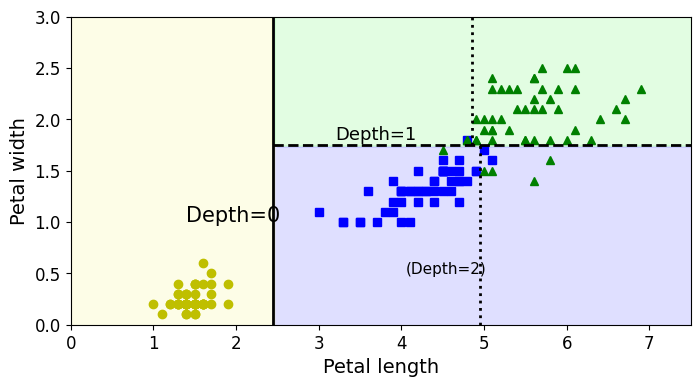

In [203]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(clf, X, y, legend=False)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

The following cell rotates the data by angle 20

In [204]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

score 0.9733333333333334


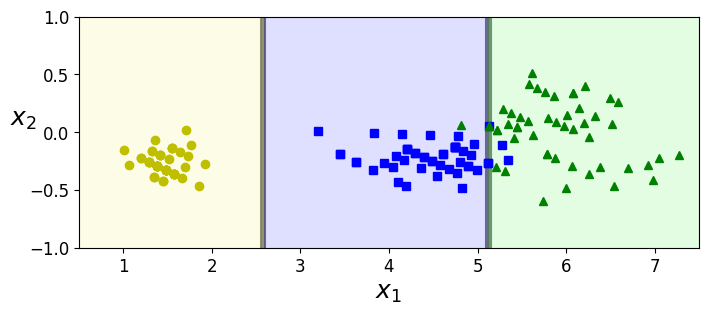

In [205]:
##### YOUR CODE HERE
clf_rotated = DecisionTreeClassifier(max_depth=2,random_state=42)
clf_rotated.fit(Xr, y)
print("score",clf_rotated.score(Xr,y))
plt.figure(figsize=(8, 3))
plot_decision_boundary(clf_rotated, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [206]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

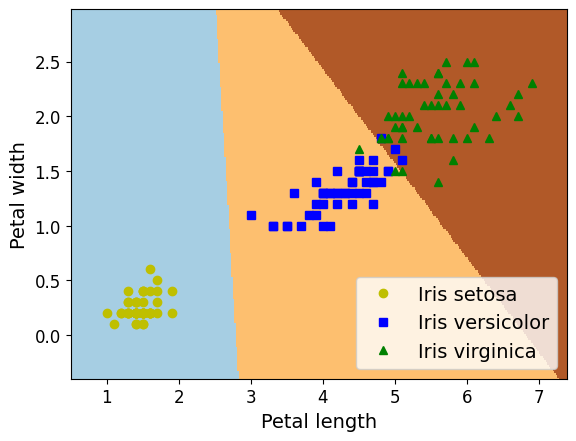

LogisticRegressionModel Train Score is :  0.9666666666666667


In [207]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X , y)
plot_logistic_regression(clf, X , y,[0,7.5,0,3],iris=True)
print('LogisticRegressionModel Train Score is : ' , clf.score(X, y))

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

score 0.9666666666666667


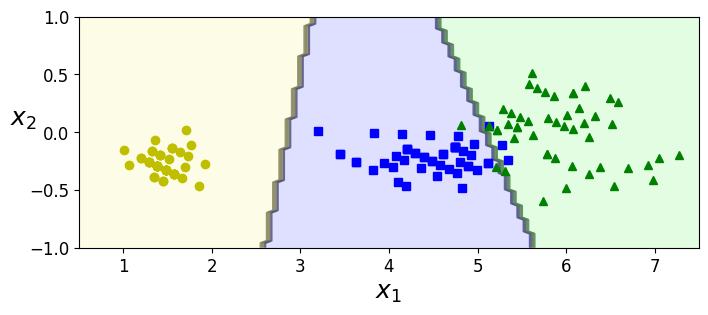

In [208]:
###### YOUR CODE HERE
###### YOUR CODE HERE
clf_rotated_l1 = LogisticRegression()
clf_rotated_l1.fit(Xr, y)
print("score",clf_rotated_l1.score(Xr,y))
plt.figure(figsize=(8, 3))
plot_decision_boundary(clf_rotated_l1, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1.in case of ==>logistic regression there is no differnces between score ,the score is the same in original data and rotated data but in case of ==> decision tree classifiers there is a difference between two scores 

2.Due to the fact that Decision Trees partition the space into increasingly smaller regions, the score of a decision tree changes when the data is rotated because the regions themselves are altered. On the other hand, Logistic Regression fits a solitary line to precisely divide the space into two, resulting in an unaltered score.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [209]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

2. Split it into a training set and a test set using train_test_split().

In [210]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.

In [211]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [212]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8648

## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. if we increase number of max_depth the model then it will leads to be overfitted 
2. At max_depth=5, the variance will be higher because increasing the maximum depth of a decision tree, the model becomes more complex and can overfit to the training data.
3. At max_depth=2, the bias error will be  higher  because decreasing the maximum depth of a decision tree, the model becomes less complex and may not capture all the underlying patterns in the data.

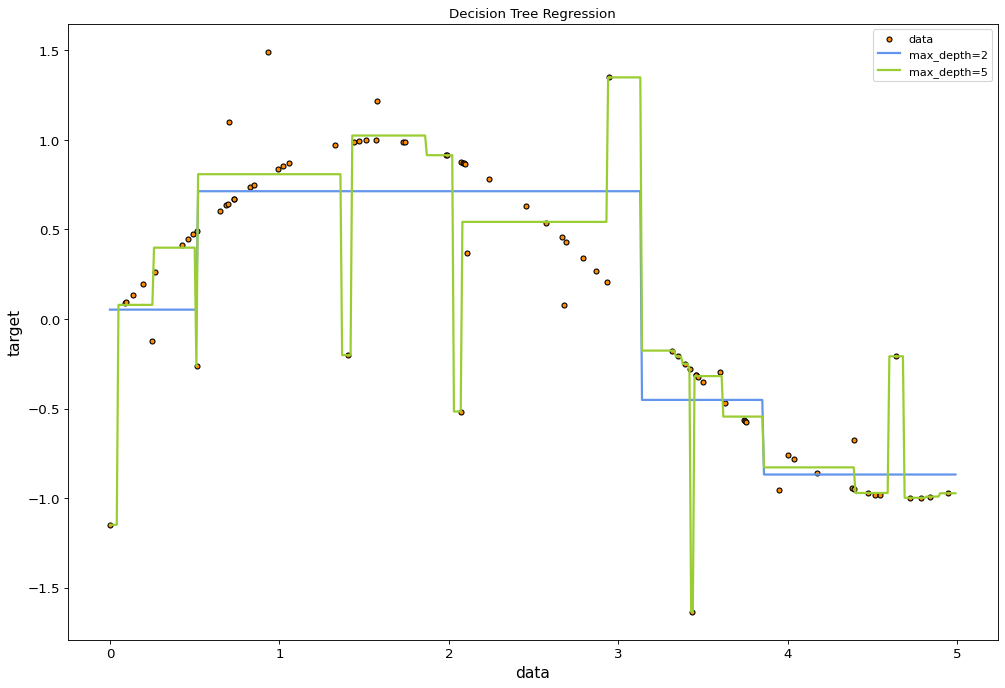

In [213]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regression_1 = DecisionTreeRegressor(max_depth=2)
regression_2 = DecisionTreeRegressor(max_depth=5)
regression_1.fit(X, y)
regression_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regression_1.predict(X_test)
y_2 = regression_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()